<a href="https://colab.research.google.com/github/PPerezdeMadrid/practicas_IA/blob/main/PR_3_IA/PracticaIA_3_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Recogida de datos**

In [ ]:
# Predicción de Salarios Práctica 3
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score,confusion_matrix, precision_score
from sklearn.tree import export_text
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans

df_salario = pd.read_csv('salary.csv')

# Posibles valores del dataframe (categorias solo)
non_numeric_columns = df_salario.select_dtypes(exclude=['int', 'float']).columns

for column in non_numeric_columns:
    unique_values = df_salario[column].unique()

    print(f"Columna: {column}")
    print("Valores Únicos:")
    print(unique_values)
    print("="*30)

# Categorización de variables
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
for column in categorical_columns:
    df_salario[column] = df_salario[column].astype('category')

Columna: workclass
Valores Únicos:
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
Columna: education
Valores Únicos:
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
Columna: marital-status
Valores Únicos:
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
Columna: occupation
Valores Únicos:
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
Columna: relationship
Valores Únicos:
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
Columna: race
Valores Únicos:
[' White'

# **Comprobar que no haya sesgo**

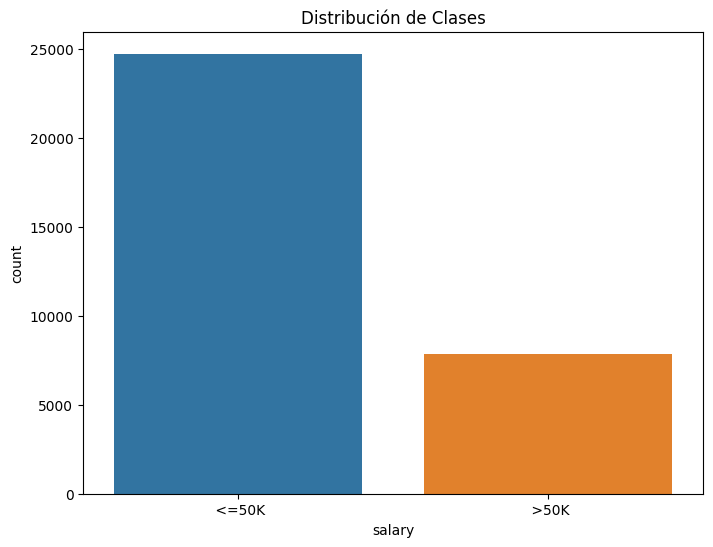

In [ ]:
# Distribución de Clases
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='salary', data=df_salario)
plt.title('Distribución de Clases')
plt.show()


<ipython-input-50-1e5108182741>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_salario.corr()


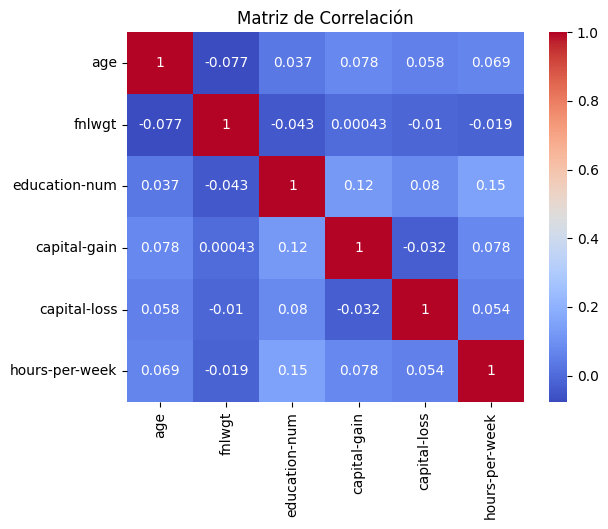

In [ ]:
# Matriz de Correlación
correlation_matrix = df_salario.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

## Solución del sesgo:

**Sobremuestreo de la Clase Minoritaria (oversampling):**

*Repite aleatoriamente ejemplos de la clase minoritaria hasta que la distribución de clases esté más equilibrada.*

 <=50K    24720
 >50K     24720
Name: salary, dtype: int64


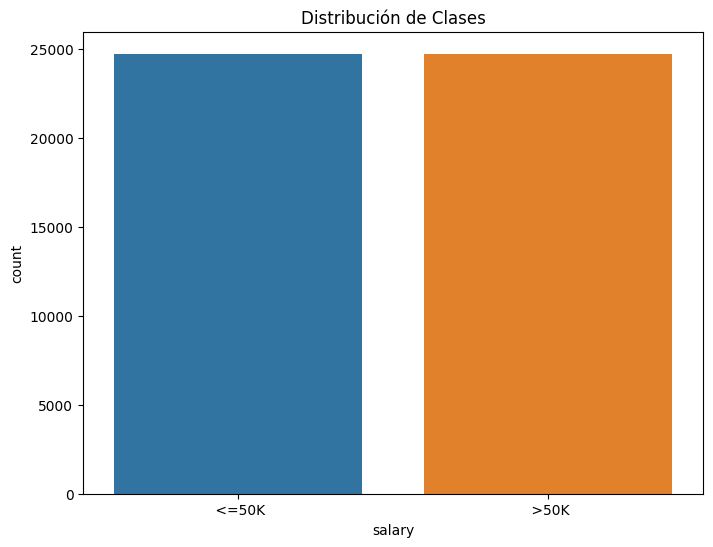

In [ ]:
from sklearn.utils import resample

# Separar las clases mayoritaria y minoritaria
df_mayoria = df_salario[df_salario['salary'] == ' <=50K']
df_minoria = df_salario[df_salario['salary'] == ' >50K']

# Realizar sobremuestreo de la clase minoritaria
n_muestras_minoritarias = len(df_minoria)
df_minoria_sobremuestreados = resample(df_minoria, replace=True, n_samples=len(df_mayoria), random_state=42)

# Concatenar las clases mayoritaria y minoritaria sobremuestreada
df_equilibrados = pd.concat([df_mayoria, df_minoria_sobremuestreados])

# Calcular el número de filas para cada clase en df_equilibrados
conteo_clases = df_equilibrados['salary'].value_counts()
print(conteo_clases)

# Visualizar Nuevo dataset
plt.figure(figsize=(8, 6))
sns.countplot(x='salary', data=df_equilibrados)
plt.title('Distribución de Clases')
plt.show()


# **Ejemplo de una persona para PREDECIR**

In [ ]:
# Ejemplo para predecir con los algoritmos
persona = pd.DataFrame({
    'age': [35],
    'workclass': ['Private'],
    'fnlwgt': [250000],
    'education': ['Bachelors'],
    'education-num': [13],
    'marital-status': ['Married-civ-spouse'],
    'occupation': ['Exec-managerial'],
    'relationship': ['Wife'],
    'race': ['White'],
    'sex': ['Female'],
    'capital-gain': [5000],
    'capital-loss': [0],
    'hours-per-week': [45],
    'native-country': ['Portugal']
})

# Categorización de las variables
for column in categorical_columns:
    persona[column] = persona[column].astype('category')

# **Entrenamiento del modelo**
1º) Dividir los datos en conjuntos de entrenamiento y pruebas\
X = Características\
Y = Objetivo (salario)

In [ ]:
# Dividir: características (X) <--> objetivo (y)
x_equilibrado = df_equilibrados.drop('salary', axis=1)
y_equilibrado = df_equilibrados['salary']

# Dividir con la regla 80/20
X_train, X_test, y_train, y_test = train_test_split(x_equilibrado, y_equilibrado, test_size=0.2, train_size=0.8, random_state=42)


# Preprocesamiento: Codificación one-hot para variables categóricas
# Para para convertir las variables categóricas en representaciones numéricas (Lo necesita)
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns)
    ],
    remainder='passthrough'
)

X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

2º) Importar y aplicar el algoritmo de árbol de decisión
- Árbol de Decisión
- Redes Neuronales
- RandomForest
- Support Vector Machine

In [ ]:
  # ÁRBOL DE DECISIÓN
# Crear el clasificador de árbol de decisión
clf = DecisionTreeClassifier(random_state=42) # controlar la aleatoriedad (misma aleatoriedad siempre, como seed de openai)

# Entrenar el modelo
clf.fit(X_train_encoded, y_train)

# Realizar predicciones
y_pred = clf.predict(X_test_encoded)

# RED NEURONAL
# Crear y entrenar un modelo de red neuronal
# MLPClassifier: MultiLayer Perceptron (perceptrón multicapa) --> usa algoritmo retropropagación q ajusta los pesos de las conexiones entre las neuronas para minimizar la función de pérdida
clf_red_neuronal = MLPClassifier(random_state=42) # seed = 42 (parecido)
clf_red_neuronal.fit(X_train_encoded, y_train)
y_pred_red_neuronal = clf_red_neuronal.predict(X_test_encoded)

feature_names_encoded = list(preprocessor.transformers_[0][1].get_feature_names_out(categorical_columns)) + list(X.columns.difference(categorical_columns))

tree_rules = export_text(clf, feature_names=feature_names_encoded)
print(tree_rules)

# RANDOM FOREST
clf_random_forest = RandomForestClassifier(random_state=42)
clf_random_forest.fit(X_train_encoded, y_train)
y_pred_random_forest = clf_random_forest.predict(X_test_encoded)

# SVM
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_encoded, y_train)
y_pred_svm = clf_svm.predict(X_test_encoded)




|--- marital-status_ Married-civ-spouse <= 0.50
|   |--- education-num <= 4668.50
|   |   |--- capital-loss <= 12.50
|   |   |   |--- fnlwgt <= 2218.50
|   |   |   |   |--- hours-per-week <= 42.50
|   |   |   |   |   |--- age <= 33.50
|   |   |   |   |   |   |--- marital-status_ Married-AF-spouse <= 0.50
|   |   |   |   |   |   |   |--- age <= 26.50
|   |   |   |   |   |   |   |   |--- workclass_ Self-emp-not-inc <= 0.50
|   |   |   |   |   |   |   |   |   |--- native-country_ Guatemala <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- capital-gain <= 23723.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- capital-gain >  23723.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- native-country_ Guatemala >  0.50
|   |   |   |   |   |   |   |   |   |   |--- workclass_ Local-gov <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class:  

3º) Medir modelo
1. **Precisión** (Accuracy):\
- Fórmula: Número de predicciones correctas\Número total de predicciones.
2. **Recall** (alcance):\
- Fórmula: Número de verdaderos positivosNúmero total de positivos reales
3. **Precisión** (Precision):
- Fórmula: Número de verdaderos positivos\Número total de positivos predichos
4. **F1-Score**:
- Interpretación: Busca un equilibrio entre precision y recall.
5. **Matriz de Confusión**:
- Interpretación:
  - Verdaderos Positivos (TP)
  - Falsos Positivos (FP)
  - Verdaderos Negativos (TN)
  - Falsos Negativos (FN)

In [ ]:
# ÁRBOL DE DECISIÓN
print("=============Árbol de Decisión======================\n")
# Precisión (predicciones correctas respecto a las dichas)
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión Árbol de decisión (predicciones correctas respecto a las dichas): {accuracy:.2f}')

# Recall (alcance, sensibilidad)
recall = recall_score(y_test, y_pred, pos_label=' >50K')  # Ajusta 'pos_label' según tu caso
print(f'Recall del  Árbol de decisión: {recall:.2f}')

# Precisión (verdaderos positivos respecto a los dichos)
precision_verdaderos = precision_score(y_test, y_pred, pos_label=' >50K')  # Ajusta 'pos_label' según tu caso
print(f'Precisión del Árbol de decisión (verdaderos positivos respecto a los dichos): {precision_verdaderos:.2f}')

# F1-Score
f1 = f1_score(y_test, y_pred, pos_label=' >50K')
print(f'F1-Score del Árbol de decisión: {f1:.2f}')

# Matriz de Confusión [TP, FP, TN, FN]
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión del Árbol de decisión:')
print(conf_matrix)


# RED NEURONAL
print("\n=============Red Neuronal======================\n")
# Precisión
accuracy = accuracy_score(y_test, y_pred_red_neuronal)
print(f'Precisión de la Red Neuronal (predicciones correctas respecto a las dichas): {accuracy:.2f}')

# Recall
recall = recall_score(y_test, y_pred_red_neuronal, pos_label=' >50K')  # Ajusta 'pos_label' según tu caso
print(f'Recall de la Red Neuronal: {recall:.2f}')

# Precisión
precision_verdaderos = precision_score(y_test, y_pred_red_neuronal, pos_label=' >50K')  # Ajusta 'pos_label' según tu caso
print(f'Precisión de la Red Neuronal (verdaderos positivos respecto a los dichos): {precision_verdaderos:.2f}')

# F1-Score
f1 = f1_score(y_test, y_pred_red_neuronal, pos_label=' >50K')
print(f'F1-Score de la Red Neuronal: {f1:.2f}')

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred_red_neuronal)
print('Matriz de Confusión de la Red Neuronal:')
print(conf_matrix)

# SVM
print("\n=============Support Vector Machines======================\n")
# Precisión
accuracy = accuracy_score(y_test, y_pred_svm)
print(f'Precisión de SMV (predicciones correctas respecto a las dichas): {accuracy:.2f}')

# Recall
recall = recall_score(y_test, y_pred_svm, pos_label=' >50K')  # Ajusta 'pos_label' según tu caso
print(f'Recall de SVM: {recall:.2f}')

# Precisión
precision_verdaderos = precision_score(y_test, y_pred_svm, pos_label=' >50K')  # Ajusta 'pos_label' según tu caso
print(f'Precisión de SVM (verdaderos positivos respecto a los dichos): {precision_verdaderos:.2f}')

# F1-Score
f1 = f1_score(y_test, y_pred_svm, pos_label=' >50K')
print(f'F1-Score de SMV: {f1:.2f}')

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred_svm)
print('Matriz de Confusión de SMV:')
print(conf_matrix)


# RANDOM FOREST
print("\n=============Random Forest======================\n")
# Precisión
accuracy = accuracy_score(y_test, y_pred_random_forest)
print(f'Precisión de Random Forest (predicciones correctas respecto a las dichas): {accuracy:.2f}')

# Recall
recall = recall_score(y_test, y_pred_random_forest, pos_label=' >50K')  # Ajusta 'pos_label' según tu caso
print(f'Recall de Random Forest: {recall:.2f}')

# Precisión
precision_verdaderos = precision_score(y_test, y_pred_random_forest, pos_label=' >50K')  # Ajusta 'pos_label' según tu caso
print(f'Precisión de Random Forest (verdaderos positivos respecto a los dichos): {precision_verdaderos:.2f}')

# F1-Score
f1 = f1_score(y_test, y_pred_random_forest, pos_label=' >50K')
print(f'F1-Score de Random Forest: {f1:.2f}')

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred_random_forest)
print('Matriz de Confusión de Random Forest:')
print(conf_matrix)



=============Árbol de Decisión======================

Precisión Árbol de decisión (predicciones correctas respecto a las dichas): 0.92
Recall del  Árbol de decisión: 0.97
Precisión del Árbol de decisión (verdaderos positivos respecto a los dichos): 0.88
F1-Score del Árbol de decisión: 0.92
Matriz de Confusión del Árbol de decisión:
[[4235  672]
 [ 166 4815]]

=============Red Neuronal======================

Precisión de la Red Neuronal (predicciones correctas respecto a las dichas): 0.72
Recall de la Red Neuronal: 0.59
Precisión de la Red Neuronal (verdaderos positivos respecto a los dichos): 0.81
F1-Score de la Red Neuronal: 0.68
Matriz de Confusión de la Red Neuronal:
[[4199  708]
 [2037 2944]]

=============Support Vector Machines======================

Precisión de SMV (predicciones correctas respecto a las dichas): 0.59
Recall de SVM: 0.19
Precisión de SVM (verdaderos positivos respecto a los dichos): 0.95
F1-Score de SMV: 0.32
Matriz de Confusión de SMV:
[[4855   52]
 [4031  950]

### *Predicción de una persona*

In [ ]:
persona_encoded = preprocessor.transform(persona)

prediccion_arbol = clf.predict(persona_encoded)
prediccion_red_neuronal = clf_red_neuronal.predict(persona_encoded)
prediccion_random_forest = clf_random_forest.predict(persona_encoded)
prediccion_svm = clf_svm.predict(persona_encoded)

print(f'Predicción de salario con Árbol de Decisión: {prediccion_arbol[0]}')
print(f'Predicción de salario con Red Neuronal: {prediccion_red_neuronal[0]}')
print(f'Predicción de salario con Random Forest: {prediccion_random_forest[0]}')
print(f'Predicción de salario con SVM: {prediccion_svm[0]}')


Predicción de salario con Árbol de Decisión:  <=50K
Predicción de salario con Red Neuronal:  >50K
Predicción de salario con Random Forest:  <=50K
Predicción de salario con SVM:  >50K
